# Capítulo 7
## Gráficas de datos y mapas

Una de las grandes ventajas de aprender programación en Python a diferencia de Fortran o C/C++, es que Python tiene paquetes para generar figuras de alta calidad (aunque yo recomiendo aprender igual Fortran o C/C++). El poder de los paquetes de gráficas en Python es mucho mayor a lo que se puede presentar en este curso y es su trabajo aprender más de lo que se muestra acá.  Adicionalmente también haré una introducción a dos paquetes de generación de mapas de alta calidad (`cartopy` y `PyGMT` y `matplotlib(pyplot)`). Ambos paquetes deben estar instalados a través de Anaconda.

Antes de empezar, es fundamental que una figura tenga toda la información necesaria para que cualquier persona que la vea lo pueda entender. Por eso, cada eje debe estar descrito, y si se tienen más de un tipo de datos, se debe explicar que significa cada uno. Para la presentación de resultados científicos y especialmente en geociencias, es importante generar figuras que muestren la información de manera correcta, veraz y con buena resolución. No es aceptable entregar figuras sin ejes explicados, o escalas si es necesario. 

Como comentario personal, aunque se muestran algunos ejemplos de figuras en 3D, éstas en muchos casos (aunque bonitas) no son útiles para presentar la información. Las páginas de revistas o la pantalla del computador es 2D, por lo que no es fácil ver la tercera dimensión. A veces es mejor un mapa de contornos, que mostrar la topografía en 3D en una figura. 

El paquete que se utilizará es `matplotlib` y específicamente `pyplot`, que generalmente hacen parte de la instalación básica de Anaconda. Los paquetes de mapas deben instalarse, por ejemplo con el archivo `unal\_geopython.yml`. 

Como referencia para las múltiples opciones de graáficas se puede encontrar en <a href="https://matplotlib.org">matplotlib.org</a>


## Graficas 1D/2D

En varios casos en una publicación se requiere comparar varias curvas o series de datos. Esto se puede hacer con una figura mostrando las diferentes señales, por ejemplo como líneas. 



### Hazlo tu mismo

En el siguiente ejercicio se obtiene un arreglo de funciones **Slepian**, (usadas en análisis de series de tiempo y métodos de Fourier) y sus valores propios (eigenvalues). El objetivo es
- Graficar las 5 curvas obtenidas usando diferentes colores y/o formatos
- Nombrar la figura y los ejes
- Poner de leyenda usando los valores propios
- Poner límites en el eje Y para que sea simétrica
- Guardar la figura en algún formato (PDF, PNG, etc.)



<function matplotlib.pyplot.show(close=None, block=None)>

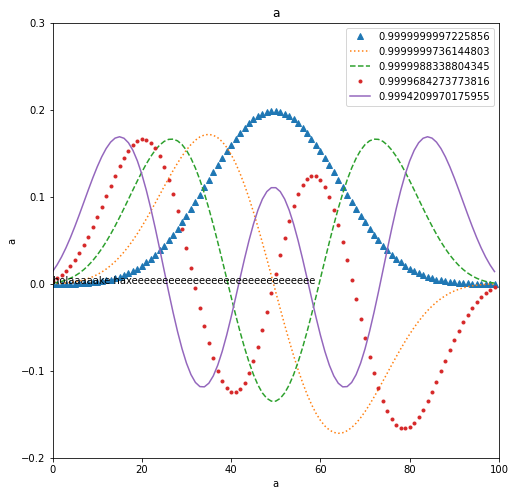

In [3]:
# plot_lines.py
# Ejemplo de varias formas de graficar arreglos
#

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

N = 100
x = np.linspace(0,N-1,N)
dpss, v = signal.windows.dpss(100, 4.0, 5, return_ratios=True) #dpss es la matriz de las curvas, 
#son 5 columnas y 100 filas, cada columna representa una curva, 'v' es [1*5]
dpss = dpss.T

#fig es el objeto, se tiene que crear porque así funciona python#

fig = plt.figure(figsize=(8,8))

#crear ejes

ax = fig.add_subplot(111)

#Graficar líneas

ax.plot(x,dpss[:,0],marker = '^',linestyle = ' ',label= v[0]) #El linestyle espacio da que no pinte la línea
ax.plot(x,dpss[:,1],':',label= v[1])
ax.plot(x,dpss[:,2],'--',label= v[2])
ax.plot(x,dpss[:,3],'.',label= v[3])
ax.plot(x,dpss[:,4],'-',label= v[4])

ax.set_xlabel('a')
ax.set_ylabel('a')
ax.set_title('a')
ax.set_xlim(0,100)       #límites de la figura
ax.set_ylim(-0.2,0.3)
ax.text(0,0,'holaaaaake haxeeeeeeeeeeeeeeeeeeeeeeeeeeeeee')
ax.legend()


plt.savefig('chap07_fig1')  #despues del punto se pone el formato que uno quiera
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

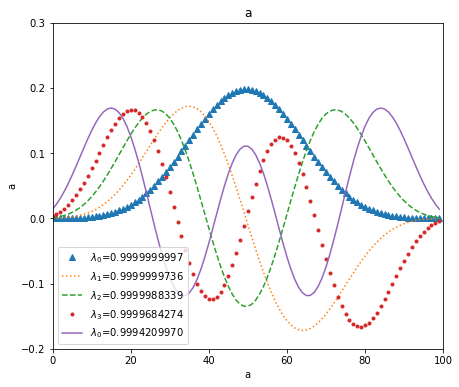

In [4]:
# mejora la gráfica
#
fig = plt.figure(figsize=(7,6))
ax  = fig.add_subplot(111)
ax.plot(x,dpss[:,0],marker = '^',linestyle = ' ',label= r'$\lambda_0$=%12.10f'%(v[0])) #El linestyle espacio da que no pinte la línea
ax.plot(x,dpss[:,1],':',label= r'$\lambda_1$=%12.10f'%(v[1]))
ax.plot(x,dpss[:,2],'--',label= r'$\lambda_2$=%12.10f'%(v[2]))
ax.plot(x,dpss[:,3],'.',label= r'$\lambda_3$=%12.10f'%(v[3]))
ax.plot(x,dpss[:,4],'-',label= r'$\lambda_0$=%12.10f'%(v[4]))

ax.set_xlabel('a')
ax.set_ylabel('a')
ax.set_title('a')
ax.set_xlim(0,100)       #límites de la figura
ax.set_ylim(-0.2,0.3)
ax.legend()


plt.savefig('chap07_fig1')  #despues del punto se pone el formato que uno quiera
plt.show


### Explicación
Como se discutió arriba, Python es un lenguaje basado en objetos. Asi mismo, las figuras se deben pensar como objetos. 
Si uno sólo quiere hacer una figura rápidamente, puede simplemente digitar
```
plt.plot(x,y)
```
y se crearía la figura. Sin embargo, en nuestro caso se busca tener mayor control en los objetos de la figura. 

Primero se genera la figura, que representa el {\it big-picture}, el cuadro completo.
```
fig = plt.figure()
```
Posteriormente se crea el {\bf axes}, que hace parte de la figura `fig`, y simplemente representa un subplot que a su vez tiene ejes `x` y `y` con el tipo de gráfica, `label`, etc. En este `axes` es que controlamos los detalles del subplot, no en la figura `fig`. Se genera entonces con:
```
ax = fig.add_subplot(111)
```
donde los números reporesentan número de filas, columnas y número del subplot en esa matriz de subplots. 

Una forma alternativa de crear la figura y axes, es
```
fig, ax = plt.subplots(1,2)
```
donde se genera una figura `fig` y dos `axes`, en este caso `ax[0]` y `ax[1]', que están organizados en una fila y dos columnas. A mi personalmente me gusta hacerlo en dos pasos, pero es una decisión personal. 



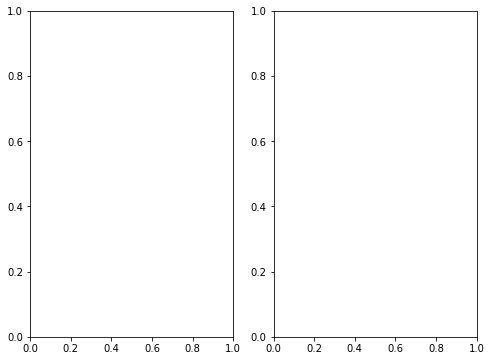

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,6))

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


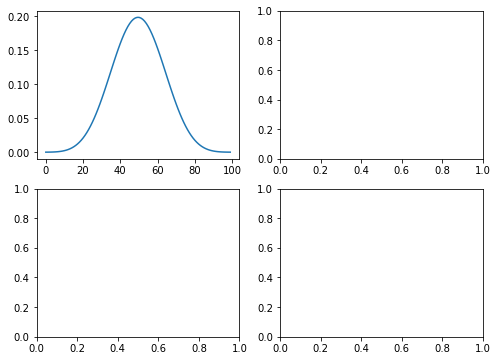

In [27]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,6))
ax #4 subfiguras estan en una matriz de 2*2
ax1 = ax[0,0]
ax1.plot(x,dpss[:,0])
print(ax)

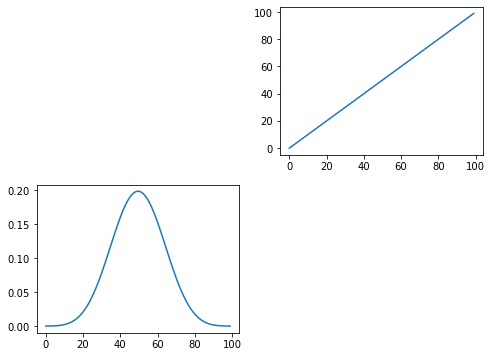

In [31]:
fig = plt.figure(figsize = (8,6)) #otra manera
ax1 = fig.add_subplot(222)
ax1.plot(x)
ax2 = fig.add_subplot(223)
ax2.plot(x,dpss[:,0])




Las líneas se pueden marcar como continuas, punteadas, etc. o reeemplazadas con símbolos. La primera línea 
```
ax.plot(x,dpss[:,0],marker='^',linestyle=' ')
```
tiene tríangulos y no hay linea, mientras que la segunda
```
ax.plot(x,dpss[:,1],':')
```
es una linea punteada (no continua). Los colores en este caso son automáticamente seleccionados por Python que tiene una secuencia de colores especificada (azul, amarillo, verde, rojo, ...). Los formatos de las líneas y de los `markers` es muy variada y está por fuera del objetivo del curso. Una explicación más precisa se puede encontrar en la documentación de `matplotlib`. El espesor de la línea, el relleno de los símbolos, etc. se puede cambiar. 

También es importante resaltar que el comando `ax.plot(x,y)` genera la figura con escala lineal-lineal, aunque también se puede usar `semilogx` o `semilogy` o `loglog`, escala logarítmica con base 10. 

Se puede adicionar texto a cada eje, título de la figura, 
```
ax.set_xlabel('tiempo')
ax.set_ylabel('Amplitud')
ax.set_title('Funciones Slepian y su concentración')
```
leyenda de los símbolos
```
ax.set_ylim((-0.22, 0.22))
ax.legend()
```
poner límites de los ejes en la gráfica (en x o y)
```
ax.set_ylim((-0.22, 0.22))
```
y finalmente guardar la figura 
```
plt.savefig(fname)
```
con un formato definido, que en este caso es un .pdf. Otros formatos incluyen `.ps`, `.eps`, `.png`, `.svg`, etc.

En Notebooks no es necesario, pero si se quiere desplegar la figura corriendo el programa en Python, se debe pedir con
```
plt.show()
```


### Hazlo tu mismo

El archivo `sopurce_error.dat` muestra los valores estimados y sus errores (5-95%) del momento sísmico ($M_0$), frecuencua de esquina ($f_c$) y caída del esfuerzo ($\tau$) para una serie de terremotos (Prieto et al., 2007).

Haga una figura con dos paneles, de $M0$ vs $f_c$ en un panel y $M_0$ vs $\tau$, incluyendo sus barras de error.
Tenga en cuenta lo siguiente
- Los valores de confianza representan la longitud del error
- Las gráficas deben estar en escala logarítmica en ambos ejes
- Marque los ejes y ponga la grilla (grid).




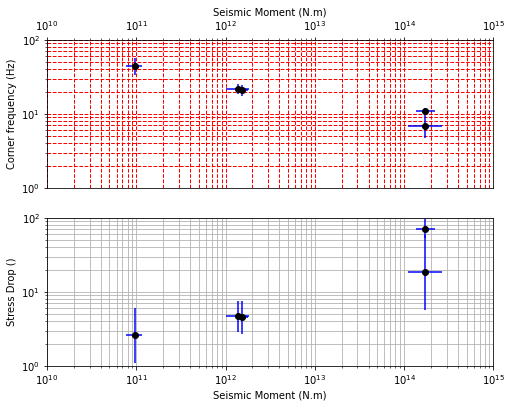

In [14]:
# plot_errorbar.py
# Dada una tabla con valores de parámetros de fuente sísmica (Prieto et al., 2007)
# hacer una gráfica con barras de error. 
#
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
fname = "data/source_error.dat"
data = np.loadtxt(fname,skiprows=1)
M0       = data[:,2]
M0_err   = data[:,3:5].T
fc       = data[:,5]
fc_err   = data[:,6:8].T
tau      = data[:,8]
tau_err  = data[:,9:11].T

# La figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))

ax1.errorbar(M0,fc,fmt = 'o',xerr = \
             M0_err,yerr = fc_err,color='k',ecolor='b') #ecolor es 
#para el color de las barrar de error
ax1.set_xscale('log')
ax1.set_yscale('log')  #Si se le pone 'lin' lo vuelve lineal
ax1.set_xlim([1e10,1e15])
ax1.set_ylim([1,100])
ax1.xaxis.tick_top()
ax1.grid(which = 'both',color='r',linestyle = '--',linewidth = 1)
ax1.set_xlabel('Seismic Moment (N.m)')
ax1.set_ylabel('Corner frequency (Hz)')
ax1.xaxis.set_label_position('top') #también es posible poner el eje y con
#'ax1.yaxis.set_label_position('top')' en la derecha introduciendo right

ax2.errorbar(M0,tau,fmt = 'o',xerr = \
             M0_err,yerr = tau_err,color='k',ecolor='b')
ax2.set_xscale('log')
ax2.set_yscale('log')  #Si se le pone 'lin' lo vuelve lineal
ax2.set_xlim([1e10,1e15])
ax2.set_ylim([1,100])
ax2.grid(which = 'both')
ax2.set_xlabel('Seismic Moment (N.m)')
ax2.set_ylabel('Stress Drop ()')

plt.show()



### Explicación
Una vez cargados los datos, se genera la figura y sus `axes` en una sola columna y dos filas
```
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))
```
Python tiene un comando para generar figuras de *barras de error*. 
```
ax1.errorbar(M0, fc,xerr=M0_err, yerr=fc_err,fmt='o')
```
en la cual se gráfica $M_0$ en el eje X y $f_c$ en el Y, con sus respectivas barras de error con `xerr` y `yerr`. Note que `errorbar` requiere la longitud de l abarra de error, no el límite máximo o mínimo. 

En el ejemplo, las barras de error son asimétricas, por lo que los arreglos `xerr` tienen dimensions `(2,N)` para describir la extensión de l abarra de error inferior y superior. Si la barra es simétrica `xerr` puede ser un arreglo `(N,)` y si todas las barras son de igual longitud para todos los puntos, `xerr` puede ser un número. Al usar `fmt='o'` se grafica las barras de error y el valor con un símbolo y no hay lineas que unan los puntos. 

En este caso, se solicita que la gráfica sea en escala logarítmica en ambos ejes
```
ax1.set_yscale('log')
ax1.set_xscale('log')
```
y se puede agregar la grilla
```
ax1.grid(which='both')
```
Finalmente, para mejorar la presentación de la figura
```
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position("top")
```
permite mover la descripción del eje a la parte superior (o al lado derecho con `ax1.xacis.tick_right`). 





### Hazlo tu mismo

Finalmente un ejemplo para mostrar una distribución de una serie de datos, que muestra por ejemplo si los datos tienen una distribución normal (gaussiana) y de otro tipo. La Figura 7.3 muestra un histograma de los datos y una cruva de una distribución normal.
El comando en este caso es `hist(X,bins=25, density=True)` que muestra el histograma de los datos dividida en 25 bins para el rango de los datos. Se han removido los valores de los ejes.


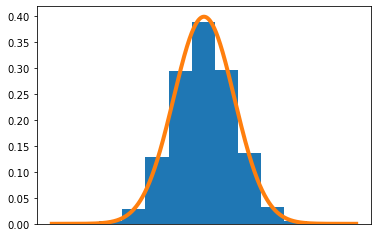

In [30]:
# plot_histogram.py
# Un histograma de datos aleatorios
#
import matplotlib.pyplot as plt
import numpy as np


rd = np.random.RandomState()
X = rd.randn(10000)
x = np.linspace(-5, 5, 1000)
y = 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2) #Ecuación gausiana


fig, ax = plt.subplots()
ax.hist(X,bins=10,density = True)
ax.plot(x,y,linewidth = 4)
ax.set_xticks([])   #para quitar ticks de abajito
plt.show()



## Graficas 2D/3D

En Geociencias, muchas veces se toman datos en la superficie de la Tierra y se quieren mostrar en mapa o en sección cruzada o en figura 3D. Sin embargo, es importante tener en cuenta que las figuras en 3D muchas veces no son muy útiles para mostrar los datos. En los siguientes ejemplos muestro 3-4 formas de presentar unos datos `z` tomados en la posición `x` y `y` donde `z` puede representar por ejemplo altura, alguna anomalía geofísica, o geoquímica, etc. 


In [101]:
# define normalized 2D gaussian
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    import numpy as np
    
    gfun1 = 1. / (2. * np.pi * sx * sy) 
    gfun2 = np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))
    gfun  = gfun1 * gfun2

    return gfun


In [106]:
# Create data

N = 45
x = np.linspace(-3,3,N)
y = np.linspace(-2,2,N)
x, y = np.meshgrid(x, y)
z1 = gaus2d(x,y,1.0,1.0,0.1,0.2)
z2 = gaus2d(x,y,0.0,0.0,0.4,0.4)
z  = z1+0.25*z2

np.savez('data/grid_matrix.npz',x=x,y=y,z=z)

N = 45*45
xrand = (np.random.rand(N)-0.5)*6
yrand = (np.random.rand(N)-0.5)*4
z1    = gaus2d(xrand,yrand,1.0,1.0,0.1,0.2)
z2    = gaus2d(xrand,yrand,0.0,0.0,0.4,0.4)
zrand = 1*z1+0.25*z2

np.savez('data/rand_matrix.npz',x=xrand,y=yrand,z=zrand)

Text(0.5, 1.0, 'linear color scale')

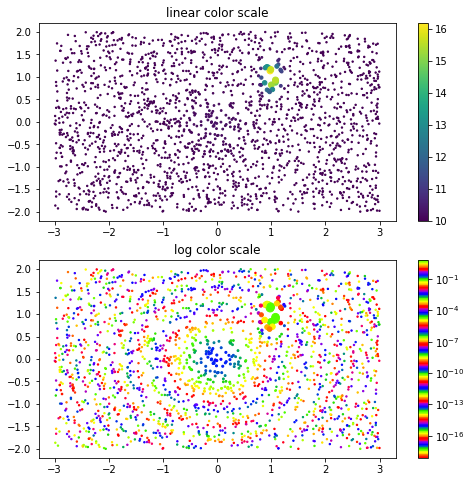

In [7]:
# plot_scatter.py

import matplotlib.colors as cm
import matplotlib.pyplot as plt
import numpy as np

fdat = np.load("data/rand_matrix.npz")
x = fdat.f.x
y = fdat.f.y
z = fdat.f.z

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
im1 = ax1.scatter(x,y,z*6+2,z+10,cmap = 'viridis') #el tercer valor representa el tamaño del círculo,
#el cuarto valor respresenta colores
#'cmap' es el mapa de colores que uno desea
#EL SCATTER NECESITA UN NOMBRE ('im1')

plt.colorbar(im1,ax = ax1)

im2 = ax2.scatter(x,y,z*10+2,c=z,norm = cm.LogNorm(),cmap='prism')
ax2.set_title('log color scale')
plt.colorbar(im2,ax = ax2)
ax1.set_title('linear color scale')


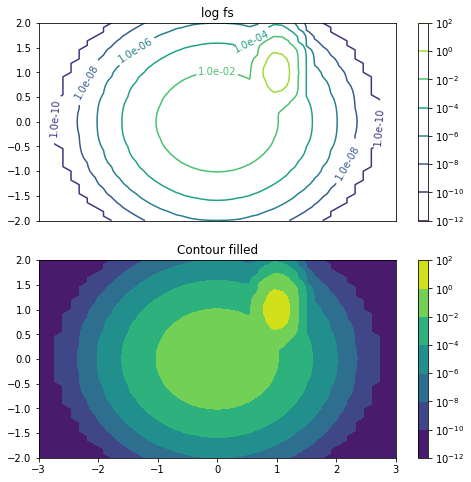

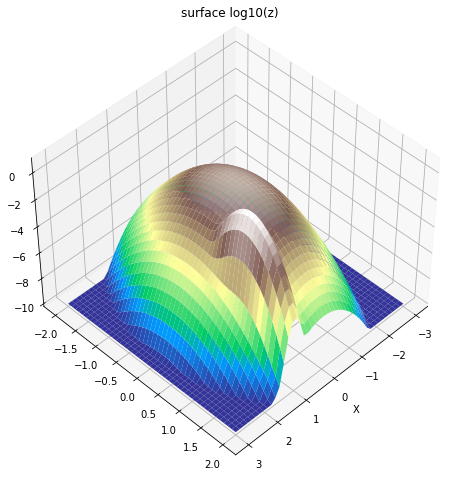

In [30]:
# plot_contour.py

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import numpy as np

fdat = np.load("data/grid_matrix.npz")
x = fdat.f.x
y = fdat.f.y
z = fdat.f.z
z = np.maximum(z,1e-10) #O a la menos 10
 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

im1 = ax1.contour(x,y,z,norm=cm.LogNorm())
ax1.clabel(im1,inline=1,fontsize=10,fmt='%4.1e')
ax1.set_xticks([])
plt.colorbar(im1,ax=ax1)
ax1.set_title('log fs')

im2=ax2.contourf(x,y,z,norm=cm.LogNorm())
plt.colorbar(im2,ax=ax2)
ax2.set_title('Contour filled')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(x,y,np.log10(z),cmap='terrain')
plt.title('surface log10(z)')
ax.set_xlabel('X')
ax.view_init(45,45)
plt.show()

In [25]:
for i in np.arange(1,20,2):
    print('i',i)
    for x in range(i):
        if x == 5:
            break
        else:
            print('este es',x)
        

i 1
este es 0
i 3
este es 0
este es 1
este es 2
i 5
este es 0
este es 1
este es 2
este es 3
este es 4
i 7
este es 0
este es 1
este es 2
este es 3
este es 4
i 9
este es 0
este es 1
este es 2
este es 3
este es 4
i 11
este es 0
este es 1
este es 2
este es 3
este es 4
i 13
este es 0
este es 1
este es 2
este es 3
este es 4
i 15
este es 0
este es 1
este es 2
este es 3
este es 4
i 17
este es 0
este es 1
este es 2
este es 3
este es 4
i 19
este es 0
este es 1
este es 2
este es 3
este es 4


In [19]:
for i in range(20):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


FileNotFoundError: [Errno 2] No such file or directory: 'ANDEAN_ARC_1.csv'